In [4]:
#D'abord faire un histogramme tout court des birds par folder
#Puis hist par rapport med(birds)-med(images)/med(images)
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import colorsys
import numpy as np
import ast

import pickle
import os
os.getcwd()

'/mnt/VegaSlowDataDisk/c3po_interface_mark/find_dominant_colors/histogrammes'

In [6]:
   
with open("list1_bn.txt", "rb") as fp:   # Unpickling
    b = pickle.load(fp)

  
#problem=b[550]

In [7]:
images=pd.read_csv("/mnt/VegaSlowDataDisk/c3po/Images_aquises/imagettes.csv")
images.head()



,path,filename,width,height,classe,xmin,ymin,xmax,ymax,index,imagetteName
0,./TGO 2019 - photos caméras/Parcelle 1 Guilbot...,DSCF0029.JPG,5200,3900,incertain,828,1592,875,1641,0,DSCF0029_incertain_0.JPG
1,./TGO 2019 - photos caméras/Parcelle 1 Guilbot...,DSCF0029.JPG,5200,3900,ground,881,1587,928,1636,1,DSCF0029_ground_1.JPG
2,./TGO 2019 - photos caméras/Parcelle 1 Guilbot...,DSCF0180.JPG,5200,3900,corneille,2842,2731,2876,2767,2,DSCF0180_corneille_2.JPG
3,./TGO 2019 - photos caméras/Parcelle 1 Guilbot...,DSCF0180.JPG,5200,3900,corneille,2799,2731,2833,2767,3,DSCF0180_corneille_3.JPG
4,./TGO 2019 - photos caméras/Parcelle 1 Guilbot...,DSCF0258.JPG,5200,3900,pigeon,3249,2638,3541,3286,4,DSCF0258_pigeon_4.JPG


In [8]:
   
fichierClasses= "/mnt/VegaSlowDataDisk/c3po/Images_aquises/Table_Labels_to_Class.csv" # overwritten by --classes myFile
frame=pd.read_csv(fichierClasses,index_col=False)

def to_reference_labels (df,class_colum,frame=frame):

    #flatten list in Labels_File
    cat=[]
    for i in range(len(frame["categories"]) ):
        cat.append( frame["categories"][i] )

    liste = [ast.literal_eval(item) for item in cat]

    # set nouvelle_classe to be the "unified" class name
    for j in range(len(frame["categories"])):
        #classesToReplace = frame["categories"][j].split(",")[0][2:-1]
        className = frame["categories"][j].split(",")[0][2:-1]
        #df["nouvelle_classe"]=df["classe"].replace(classesToReplace,className)
        df[class_colum]=df[class_colum].replace(liste[j],className)

    return df

images=to_reference_labels (images,"classe")
liste_to_keep=["corneille","faisan","pigeon","oiseau"]
images=images[images["classe"].isin(liste_to_keep)]  
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"

In [10]:
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
images_0=images[images["path"]=='./DonneesPI/timeLapsePhotos_Pi1_1']
liste_images_fold0=list(images_0["filename"].unique())
liste_images_fold0=liste_images_fold0
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_1/"
imagettes_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
birds_norm_liste=[]





for image_path in liste_images_fold0[200:300]:
    
    path=fold_path+image_path
    #print(path)
    image_bgr=cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_rgb_reshape=(image_rgb.reshape(-1,3))

    color_image=[]


    for i in range(len(image_rgb_reshape)):
        pixel=image_rgb_reshape[i]
        red=pixel[0]
        green=pixel[1]
        blue=pixel[2]
        hsv=colorsys.rgb_to_hsv(red,green,blue)
        color=hsv[0]*360
        color_image.append(color)
    
    #Faire un filtre pour le ciel, éventuellement l'herbe
    color_filtre=[ i for i in color_image if (i<100 and (i>10) )]
    med_im_color=np.median(color_filtre)
    #print(med_im_color)
    
    imagettes_liste=images["imagetteName"][images["filename"]==image_path]
    imagettes_liste=list(imagettes_liste.unique())
    
    for imagette in imagettes_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        birds_norm_liste.append(birds_norm)




/home/marcpozzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in double_scalars


[-0.07407405273413868,
 -0.07407405273413868,
 0.05555555555555555,
 0.30434781312942505,
 0.4202898457142466,
 0.72173912525177,
 0.72173912525177,
 0.7470355684107001,
 0.5826086928533472,
 0.6837944587999824,
 0.72173912525177,
 0.72173912525177,
 0.30434781312942505,
 0.7833333313465118,
 0.8030303001568009,
 0.8260869532823563,
 -0.04347834250201836,
 0.30434781312942505,
 0.8662207329874331,
 0.8790170109790304,
 0.8428571391166473,
 0.8253968211168244,
 0.8666666637767445,
 0.8683385632254861,
 0.844827592042573,
 0.8354232031400811,
 0.8253968211168244,
 0.8441558426076715,
 0.8441558426076715,
 -inf,
 0.8181818181818182,
 0.8787878860126842,
 0.8787878860126842,
 -0.011627913214439942,
 0.8840579779251762,
 0.8735177827918011,
 0.8747826037199601,
 0.8823529486012706,
 0.8819444519208951,
 0.8990680940689579,
 -2.817460704890532,
 0.8978605892347253,
 -2.466666129430186,
 0.8840579779251762,
 0.39567967373010626,
 0.38974359035491946,
 0.11378205527704584,
 0.0,
 0.65736433437

In [15]:
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
images_0=images[images["path"]=='./DonneesPI/timeLapsePhotos_Pi1_1']
liste_images_fold0=list(images_0["filename"].unique())
liste_images_fold0=liste_images_fold0
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_1/"
imagettes_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
birds_norm_liste=[]





for image_path in liste_images_fold0[200:240]:
    
    path=fold_path+image_path
    print("image :", image_path)
    image_bgr=cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_rgb_reshape=(image_rgb.reshape(-1,3))

    color_image=[]


    for i in range(len(image_rgb_reshape)):
        pixel=image_rgb_reshape[i]
        red=pixel[0]
        green=pixel[1]
        blue=pixel[2]
        hsv=colorsys.rgb_to_hsv(red,green,blue)
        color=hsv[0]*360
        color_image.append(color)
    
    #Faire un filtre pour le ciel, éventuellement l'herbe
    color_filtre=[ i for i in color_image if (i<100 and (i>10) )]
    med_im_color=np.median(color_filtre)
    #print(med_im_color)
    
    imagettes_liste=images["imagetteName"][images["filename"]==image_path]
    imagettes_liste=list(imagettes_liste.unique())
    
    for imagette in imagettes_liste:
        print("imagette :",imagette)
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        birds_norm_liste.append(birds_norm)
        print(birds_norm)




image : image_2019-04-19_20-12-05.jpg
imagette : image_2019-04-19_20-12-05_corneille_4767.JPG
-0.07407405273413868
image : image_2019-04-19_20-12-22.jpg
imagette : image_2019-04-19_20-12-22_corneille_4769.JPG
-0.07407405273413868
image : image_2019-04-19_20-12-39.jpg
imagette : image_2019-04-19_20-12-39_corneille_4771.JPG
0.05555555555555555
image : image_2019-04-20_07-06-50.jpg
imagette : image_2019-04-20_07-06-50_pigeon_4773.JPG
0.30434781312942505
imagette : image_2019-04-20_07-06-50_pigeon_4775.JPG
0.4202898457142466
image : image_2019-04-20_07-07-06.jpg
imagette : image_2019-04-20_07-07-06_pigeon_4777.JPG
0.72173912525177
imagette : image_2019-04-20_07-07-06_pigeon_4779.JPG
0.72173912525177
imagette : image_2019-04-20_07-07-06_pigeon_4781.JPG
0.7470355684107001
imagette : image_2019-04-20_07-07-06_pigeon_4783.JPG
0.5826086928533472
image : image_2019-04-20_07-07-23.jpg
imagette : image_2019-04-20_07-07-23_pigeon_4785.JPG
0.6837944587999824
imagette : image_2019-04-20_07-07-23_pige

/home/marcpozzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in double_scalars


imagette : image_2019-04-20_07-26-00_corneille_4827.JPG
0.8181818181818182
image : image_2019-04-20_07-30-44.jpg
imagette : image_2019-04-20_07-30-44_corneille_4829.JPG
0.8787878860126842
image : image_2019-04-20_07-31-01.jpg
imagette : image_2019-04-20_07-31-01_corneille_4831.JPG
0.8787878860126842
image : image_2019-04-20_07-31-17.jpg
imagette : image_2019-04-20_07-31-17_corneille_4833.JPG
-0.011627913214439942
image : image_2019-04-20_07-31-34.jpg
imagette : image_2019-04-20_07-31-34_corneille_4835.JPG
0.8840579779251762
image : image_2019-04-20_07-31-51.jpg
imagette : image_2019-04-20_07-31-51_corneille_4837.JPG
0.8735177827918011
image : image_2019-04-20_07-32-07.jpg
imagette : image_2019-04-20_07-32-07_corneille_4839.JPG
0.8747826037199601
image : image_2019-04-20_07-32-24.jpg
imagette : image_2019-04-20_07-32-24_corneille_4841.JPG
0.8823529486012706
image : image_2019-04-20_07-32-41.jpg
imagette : image_2019-04-20_07-32-41_corneille_4843.JPG
0.8819444519208951
image : image_2019

KeyboardInterrupt: 

image : image_2019-04-20_07-25-43.jpg


60.0

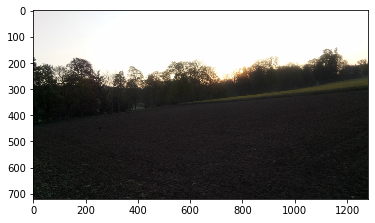

In [20]:
    color_image=[]
    image_path="image_2019-04-20_07-25-43.jpg"

    path=fold_path+image_path

    print("image :", image_path)
    image_bgr=cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    image_rgb_reshape=(image_rgb.reshape(-1,3))

    for i in range(len(image_rgb_reshape)):
        pixel=image_rgb_reshape[i]
        red=pixel[0]
        green=pixel[1]
        blue=pixel[2]
        hsv=colorsys.rgb_to_hsv(red,green,blue)
        color=hsv[0]*360
        color_image.append(color)
    np.median(color_image)


In [21]:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    

        imagettes="image_2019-04-20_07-25-43_corneille_4825.JPG"
        path=imagettes_path+imagette
        
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        birds_norm_liste.append(birds_norm)
        print(birds_norm)

0.8840579779251762


In [ ]:
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
images_0=images[images["path"]=='./DonneesPI/timeLapsePhotos_Pi1_1']
liste_images_fold0=list(images_0["filename"].unique())
liste_images_fold0=liste_images_fold0
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_1/"
imagettes_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
birds_norm_liste=[]





for image_path in liste_images_fold0[200:240]:
    
    path=fold_path+image_path
    print("image :", image_path)
    image_bgr=cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_rgb_reshape=(image_rgb.reshape(-1,3))

    color_image=[]


    for i in range(len(image_rgb_reshape)):
        pixel=image_rgb_reshape[i]
        red=pixel[0]
        green=pixel[1]
        blue=pixel[2]
        hsv=colorsys.rgb_to_hsv(red,green,blue)
        color=hsv[0]*360
        color_image.append(color)
    
    #Faire un filtre pour le ciel, éventuellement l'herbe
    color_filtre=[ i for i in color_image if (i<100 and (i>10) )]
    med_im_color=np.median(color_filtre)
    #print(med_im_color)
    
    imagettes_liste=images["imagetteName"][images["filename"]==image_path]
    imagettes_liste=list(imagettes_liste.unique())
    
    for imagette in imagettes_liste:
        print("imagette :",imagette)
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        birds_norm_liste.append(birds_norm)
        print(birds_norm)

32.0